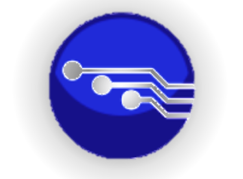

# <center> Unsupervised Learning Methods 2022 </center>
## <center> Problem Set 1 </center>
### <center> Optimization </center>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 3 Descent Methods

### Gradient descent
* Let $\boldsymbol{Y}\in\mathbb{R}^{d\times d}$ be a blurred version
of the image $\boldsymbol{X}\in\mathbb{R}^{d\times d}$:
$$\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}$$
where $\boldsymbol{H}\in\mathbb{R}^{d\times d}$ is a known (separable)
blurring matrix.

#### Load the data ($\boldsymbol{Y}$ and $\boldsymbol{H}$):

In [97]:
from scipy.io import loadmat

data = loadmat('data.mat')
Y    = data['Y']
H    = data['H']

Y.shape, H.shape

((256, 256), (256, 256))

#### Plot $Y$ and $H$:

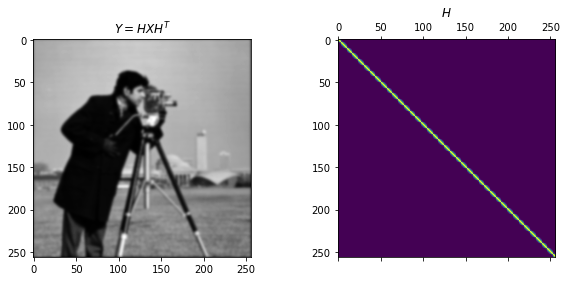

In [98]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow   (Y, cmap='gray')
ax[1].matshow  (H)
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$H$')
plt.show       ()

* Our goal is to find $\boldsymbol{X}$ that minimizes:
$$\boldsymbol{X}^{\star}=\arg\min_{\boldsymbol{X}}f\left(\boldsymbol{X}\right)=\arg\min_{\boldsymbol{X}}\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

### 3.1
1. Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.
2. Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip:** Avoid inverting the same matrix twice!

# 3.1.1
* our objective 
    * $ f(x)= (Y-H*X*H^{T})^{2} $
* need to differentiate to find the minimum and equal to 0
    * $\nabla f(x)=-2 H*H^{T} (Y-H *X*H^{T})$
    * $\nabla f(x) = 0$
* equal to 0
    * $-2 H*H^{T} (Y-H *X*H^{T}) = 0 \to\to  (Y-H *X*H^{T}) = 0 $
    * $H *X*H^{T} = Y \to\to X=H^{-1}Y(H^{T})^{-1}$
    
* $X^{*} = H^{-1}Y(H^{T})^{-1}$

In [99]:
def gradient(X,H,Y):
    HT = np.transpose(H)
    H_X = np.matmul(H,X)
    H_X_HT = np.matmul(H_X,HT)
    H_HT = np.matmul(H,HT)
    error = (Y-H_X_HT)
    gradient = 2*np.matmul(error,H_HT)
    return gradient

In [100]:
# set const matrix multipication
HT = H.T
H_HT = np.matmul(H,HT)
H_inv = np.linalg.inv(H)
H_T_inv = np.linalg.inv(H.T)

In [101]:
#error = (Y-H_X_HT)
#H_X = np.matmul(H,X)
#H_X_HT = np.matmul(H_X,HT)

# 3.1.2

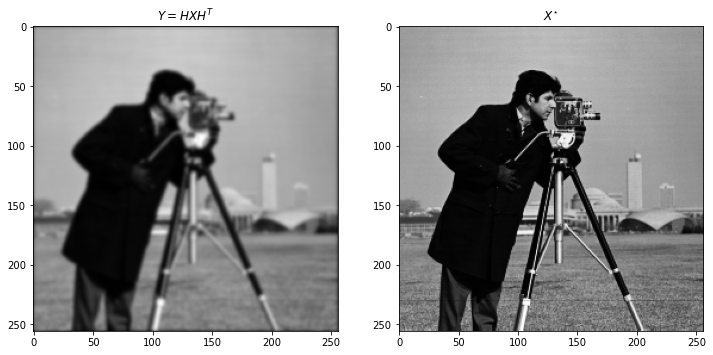

In [102]:
####################################
##--Your code here...
Xstar = H_inv@Y@H_T_inv
####################################
_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow   (Y,     cmap='gray')
ax[1].imshow   (Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
plt.show       ()

------------------------------------------------------------------------------------------------------
* To avoid matrix inversion, we will find $\boldsymbol{X}^{\star}$ using gradient descent.
### 3.2
1. Implement the following functions **(in the cell below)** where
$$f\left(\boldsymbol{X}\right)=\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

```python
#==================================================#
def f(X):
#==================================================#
def Df(X):
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
#==================================================#
```

2. Set a reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 

# 3.2.1

In [103]:
####################################################
##--Your code here...
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    return np.power(np.abs(Y - H*X*H.T), 2)

def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return -2* H@H.T@(Y-H@X@H.T)

def ApplyGradientDescent(f, Df, X0, lr, ε):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    current_X = X0
    iteration =0
    achieve_desire_error = pass_max_iteration =  True
    while achieve_desire_error and pass_max_iteration:
        # increase the amount of iterations
        iteration +=1
        old_X = current_X.copy()
        # current X minus the gradient
        current_X +=  - lr * Df(old_X)
        # calculate the error
        current_error = np.power(np.linalg.norm(Y- H@current_X@H.T),2)
        achieve_desire_error = (current_error > ε)
        pass_max_iteration = (iteration < MAX_ITERATIONS)

    return current_X
#==================================================#

# 3.2.2

In [104]:
# initial matrix to be the blurred image 
X0 = Y.copy()

# 3.2.3

In [105]:
%time
MAX_ITERATIONS = 100000

lr = 0.001
ε = math.pow(10,-4)
new_x = ApplyGradientDescent(f, Df, X0, lr, ε)

Wall time: 0 ns


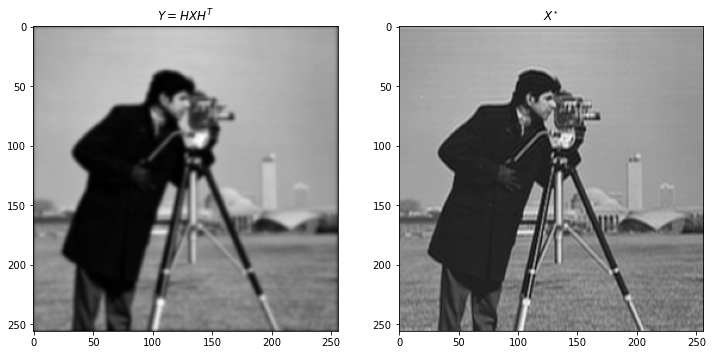

In [106]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(new_x, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
plt.show()

------------------------------------------------------------------------------------------------------
<div class="alert alert-block alert-warning">
<span style="color:black">

**Momentum**
* <ins>Momentum</ins> is an effective method to improve convergence rate.
* Gradient descent update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)$$
* Momentum update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$$
where $\beta\in[0,1)$ and typically $0.9\leq\beta\leq0.99$.

</span>
</div>
    
### 3.3
Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

* Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
    * $$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$
$$\boldsymbol{x}^{\left(t + 1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t\right)}-\boldsymbol{x}^{\left(t-1\right)}\right)$$


* set $ x^{t} = \boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$

    * $${x}^{\left(t + 1\right)}={x}^{\left(t\right)}-\mu\nabla f\left({x}^{\left(t\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)-{x}^{\left(t-1\right)}\right)$$

$${x}^{\left(t + 1\right)}={x}^{\left(t\right)}-\mu\nabla f\left({x}^{\left(t\right)}\right)+\beta\left(-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)\right)$$

* set $ x^{t-1} = \boldsymbol{x}^{\left(t-2\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-2\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-2\right)}-\boldsymbol{x}^{\left(t-3\right)}\right)$


$${x}^{\left(t + 1\right)}={x}^{\left(t\right)}-\mu\nabla f\left({x}^{\left(t\right)}\right)+\beta\left(-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-2\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-2\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-2\right)}-\boldsymbol{x}^{\left(t-3\right)}\right)-\boldsymbol{x}^{\left(t-2\right)}\right)\right)=$$ 
$${x}^{\left(t + 1\right)}={x}^{\left(t\right)}-\mu\nabla f\left({x}^{\left(t\right)}\right)+\beta\left(-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(-\mu\nabla f\left(\boldsymbol{x}^{\left(t-2\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-2\right)}-\boldsymbol{x}^{\left(t-3\right)}\right)\right)\right)=$$ 

$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

### 3.4
1. Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
#====================================================#
```

2. Set (the same) reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 
    * Compare the run-time performance with and without momentum.  
      (play with the hyper-parameters).
        * **2% Bonus:**  
            Plot the objective value $f(\boldsymbol{X})$ as a function of the iterations.  
            You may need to modify your code slightly.

# 3.4.1

In [107]:
####################################################
##--Your code here...

#-- 1.
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    error_list_per_iteration = list()
    current_X = X0
    iteration =0
    x_minus_2 = current_X - lr * Df(current_X)
    achieve_desire_error = pass_max_iteration =  True
    while achieve_desire_error and pass_max_iteration:
        
        old_X = current_X.copy()
        # calculate next X
        current_X +=  - lr * Df(old_X) - β * (old_X - x_minus_2)
        x_minus_2 = old_X.copy()
        current_error = np.power(np.linalg.norm(Y- H@current_X@H.T),2)
        error_list_per_iteration.append(current_error)
        iteration += 1
        achieve_desire_error = (current_error > ε)
        pass_max_iteration = (iteration < MAX_ITERATIONS)
        
        
    return current_X, error_list_per_iteration


####################################################

# 3.4.2

In [108]:
# initial matrix to be the blurred image 
X0 = Y.copy()

## 3.4.3

In [109]:
%time
MAX_ITERATIONS = 100000

lr = 0.1
ε =math.pow(10,-4)
β = 0.9

new_x, list_fx = ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε)


Wall time: 0 ns


Text(0.5, 1.0, '$X^{\\star}$')

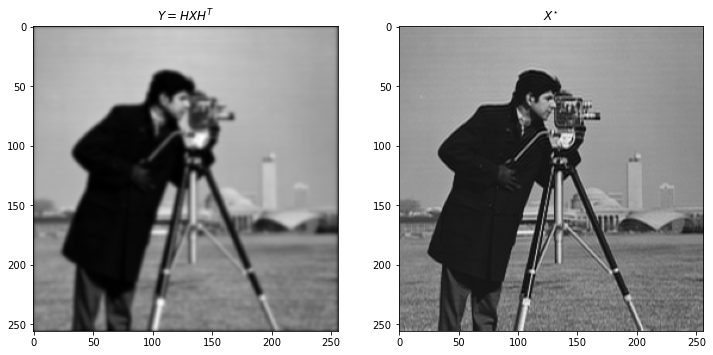

In [110]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(new_x, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')

## 2% Bonus

In [123]:
beta_options = np.arange(0.65,1,0.1)
beta_options = np.append(beta_options, [0.99,0.9])
lr_options = [1e-4,1e-3,1e-2,1e-1]
label_list = list()
error_list = list()
MAX_ITERATIONS = 5000

for i_beta in beta_options:
    for i_lr in lr_options:
        X0 = Y.copy()
        new_x, current_error_list = ApplyGradientDescentMomentum(f, Df, X0, i_lr, i_beta, ε)
        min_mse = np.round(np.min(current_error_list),3)
        label_string = 'lr='+str(i_lr)+', betta=' +  str(i_beta) + ', mse=' + str(min_mse)
        error_list.append(current_error_list)
        label_list.append(label_string)
        
        

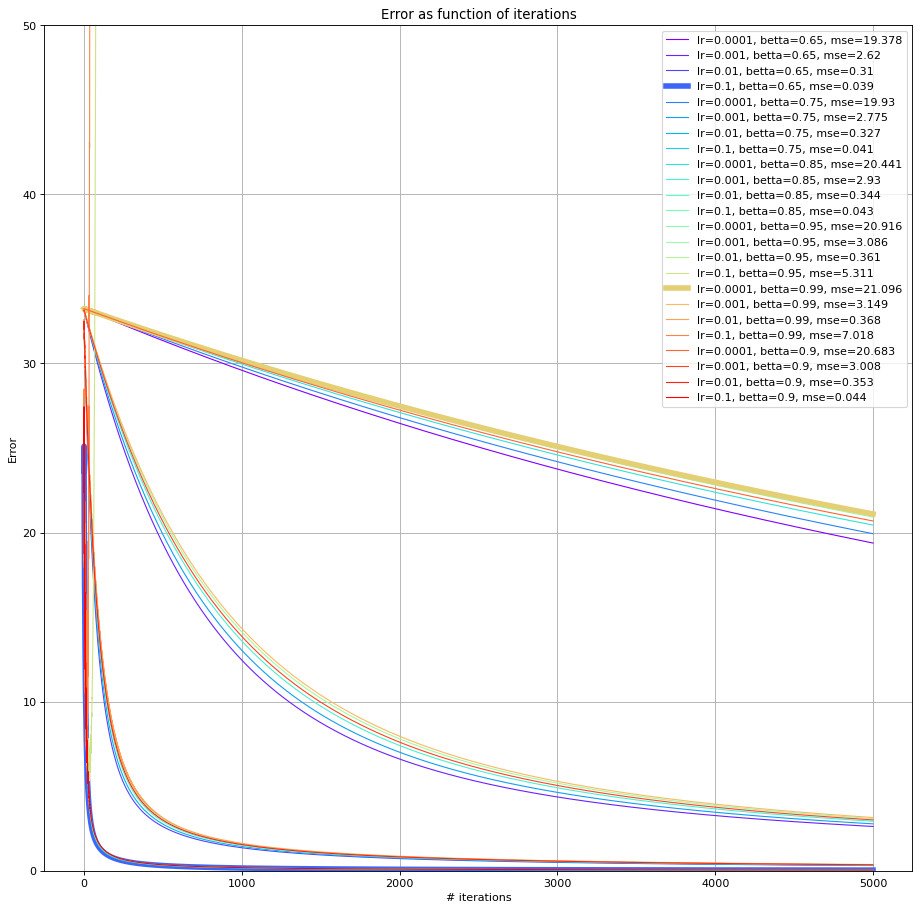

In [124]:
from matplotlib.pyplot import cm
error_list_mins  =  list(map(lambda x: np.min(x), error_list))
error_list_mins_array = np.array(error_list_mins)
min_mse_index = np.where(error_list_mins_array == np.min(error_list_mins_array))[0][0]
max_mse_index = np.where(error_list_mins_array == np.max(error_list_mins_array))[0][0]

plt.figure(figsize=(14, 14), dpi=80)
color = cm.rainbow(np.linspace(0, 1, label_list.__len__()))

for i in range(label_list.__len__()):
    if i in [min_mse_index, max_mse_index]:
        linewidth = 5
    else:
        linewidth = 1
    
    current_error_list = error_list[i]
    current_label_list = label_list[i]
    plt.plot(current_error_list, label = current_label_list, color = color[i], linewidth = linewidth)
plt.grid()
plt.title('Error as function of iterations')
plt.xlabel('# iterations')
plt.ylabel('Error')
plt.ylim([0,50])
plt.legend()
plt.show()